In [1]:
# Description: This program use Convolutional Neural Networks(CNN)
#classify handwritten digits as number 0-9

In [1]:
#importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

AttributeError: module 'numpy' has no attribute 'typeDict'

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:511: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [3]:
#Load the data and split it into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


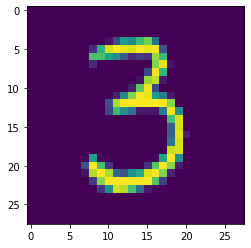

In [5]:
plt.imshow(X_train[50])

In [6]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#Train the model
hist = model.fit(X_train,y_train_one_hot, validation_split = .2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 85s 56ms/step - loss: 0.2679 - accuracy: 0.9432 - val_loss: 0.0996 - val_accuracy: 0.9720
Epoch 2/10
1500/1500 [==============================] - 88s 59ms/step - loss: 0.0812 - accuracy: 0.9752 - val_loss: 0.0745 - val_accuracy: 0.9789
Epoch 3/10
1500/1500 [==============================] - 88s 59ms/step - loss: 0.0595 - accuracy: 0.9820 - val_loss: 0.0905 - val_accuracy: 0.9739
Epoch 4/10
1500/1500 [==============================] - 92s 61ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0791 - val_accuracy: 0.9788
Epoch 5/10
1500/1500 [==============================] - 87s 58ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0915 - val_accuracy: 0.9768
Epoch 6/10
1500/1500 [==============================] - 99s 66ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.1111 - val_accuracy: 0.9779
Epoch 7/10
1500/1500 [==============================] - 89s 59ms/step - loss: 0.0268 - accuracy: 0.9923 - val_loss: 0.1166 -

In [11]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 5s 14ms/step


array([[3.8544818e-13, 2.1973902e-21, 7.3838792e-13, ..., 1.0000000e+00,
        2.7490547e-15, 1.8967229e-14],
       [1.2977778e-17, 1.1499827e-09, 1.0000000e+00, ..., 8.1122840e-31,
        2.3464940e-19, 3.7928826e-22],
       [9.1294333e-13, 9.9998522e-01, 3.0877937e-12, ..., 3.9731180e-08,
        1.4492994e-05, 1.0195420e-13],
       ...,
       [5.2999998e-20, 1.4355574e-15, 8.6034643e-29, ..., 3.8434006e-11,
        9.4386242e-11, 8.1466035e-11],
       [2.5841713e-16, 1.3601114e-24, 2.2029178e-16, ..., 2.8723860e-19,
        4.0134178e-06, 1.1476912e-15],
       [9.0407448e-20, 4.6983825e-30, 1.6397494e-18, ..., 3.5115390e-29,
        3.2158091e-12, 2.2422814e-25]], dtype=float32)

In [14]:
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [15]:
y_classes = y_pred.argmax(axis=-1)

In [16]:
score = accuracy_score(y_test, y_classes)
print('Model Accuracy:', score)

Model Accuracy: 0.9793
